In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [262]:
df=pd.read_csv('/Users/hanafahim/Desktop/titanic.csv')


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [264]:
df.drop(columns=['Name','Ticket','PassengerId','Cabin'],axis=1,inplace=True)

In [265]:
df.dropna(subset=['Embarked'], inplace=True)

In [266]:
df=pd.get_dummies(df, columns=['Embarked','Sex'],drop_first=True)

In [267]:
df.replace({True:1,False:0},inplace=True)

(array([ 54.,  46., 177., 169., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

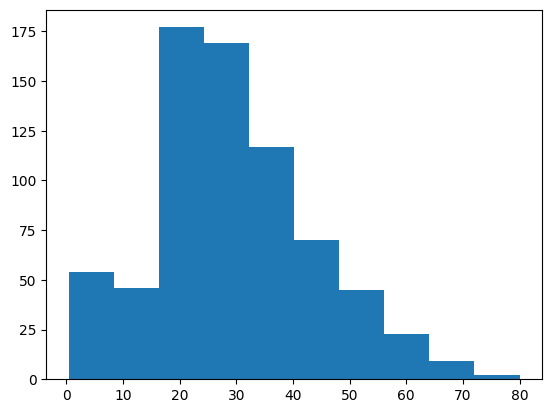

In [268]:
plt.hist(df['Age'])

In [269]:
skewness = df['Age'].skew()
print(f'Skewness of the data: {skewness}')

Skewness of the data: 0.3888806178753708


In [126]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
count,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681,0.086614,0.724409,0.649044
std,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504,0.281427,0.447063,0.477538
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [127]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   Embarked_Q  889 non-null    int64  
 7   Embarked_S  889 non-null    int64  
 8   Sex_male    889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [167]:
df=df.sample(frac=1, random_state=42)
split_idx = int(0.7 * len(df))
split2=int(0.85*len(df))
x=df.drop(columns=['Survived'],axis=1)
y=df["Survived"]
y_train=y[:split_idx]
x_train=x[:split_idx]
y_test=y[split_idx:split2]
x_test=x[split_idx:split2]
x_val=x[split2:]
y_val=y[split2:]
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
x_val=x_val.to_numpy()
y_val=y_val.to_numpy()

In [168]:
m,n=np.shape(x_train)
w=np.zeros((n,))
b=0

In [180]:
def z_score_normalise(x):
    mu=np.mean(x,axis=0)
    sigma=np.std(x,axis=0)
    x_norm=(x-mu)/sigma
    return x_norm,mu,sigma
x_train_norm,mu,sigma=z_score_normalise(x_train)

x_val_norm=(x_val-mu)/sigma


In [190]:
def sigmoid(x,w,b):
    m,n=np.shape(x)
    z=np.zeros((m,))
    for i in range(m):
        z[i]=np.dot(x[i],w)+b
    m=np.shape(z)[0]
    g_wb=np.ones((m,))
    g_wb*=(1/(1+np.exp(-z)))
    return g_wb

In [191]:
m,n=np.shape(x_train)

y_train=y_train.reshape(m,)
w=np.zeros((n,))
b=0


In [192]:
def compute_cost(x,y,w,b):
    m,n=np.shape(x)

    f_wb = sigmoid(x,w,b)
    epsilon = 1e-5

    cost = (-1 / m) * np.sum(y * np.log(f_wb+ epsilon) + (1 - y) * np.log(1 - f_wb+epsilon))
    
    return cost

In [231]:
def compute_gradient_logistic(x,y,w,b):
    m,n=np.shape(x)
    g_wb=sigmoid(x,w,b)
    dj_dw=np.zeros((n,))
    dj_db=0
    err=g_wb-y
    dj_db=np.sum(err)
    for i in range(m):
        for j in range(n):
            dj_dw[j]+=err[i]*x[i,j]
    dj_dw/=m
    dj_db/=m
    return dj_dw,dj_db

In [252]:
def gradient_descent(x,y,x_val,y_val,w,b,num_iters,alpha):
    j_history=[]
    j_hist_val=[]
    for i in range(num_iters):
        dj_dw,dj_db=compute_gradient_logistic(x,y,w,b)
        w-=alpha*dj_dw
        b-=alpha*dj_db
        j_history.append(compute_cost(x,y,w,b))
        j_hist_val.append(compute_cost(x_val,y_val,w,b))

    return w,b,j_history,j_hist_val

In [253]:
m,n=np.shape(x_train)
w=np.zeros((n,))
b=0

In [254]:
y_train=y_train.reshape(m,)
iters=350
alpha=0.1
w_fin,b_fin,j_hist,j_hist_val=gradient_descent(x_train_norm,y_train,x_val_norm,y_val,w,b,iters,alpha)


(350,)
(350,)


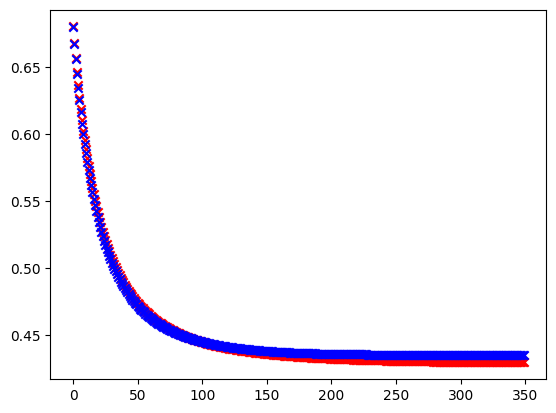

In [255]:
iters=np.arange(iters)
print(np.shape(iters))
j_hist=np.array(j_hist)
print(np.shape(j_hist))
plt.scatter(iters,j_hist,color='red',marker='x')
plt.scatter (iters,j_hist_val,color='blue',marker='x')

In [256]:
y_train=y_train.reshape(m,)
iters=200
alpha=0.1
w_fin,b_fin,j_hist,j_hist_val=gradient_descent(x_train_norm,y_train,x_val_norm,y_val,w,b,iters,alpha)


In [257]:
m,n=np.shape(x_train)

y_pred_train=np.zeros((m,))
g_wb=sigmoid(x_train_norm,w_fin,b_fin)
for i in range(m):
    if (g_wb[i]>=0.5):
        y_pred_train[i]=1
    else:
        y_pred_train[i]=0
y_pred_train=y_pred_train.astype(int)
count=0
for i in range (m):
    if y_train[i]==y_pred_train[i]:
        count+=1

print(f"training accuracy:{round(count*100/m)}%")

training accuracy:80%


In [258]:
m,n=np.shape(x_test)
x_test_norm=(x_test-mu)/sigma
y_pred=np.zeros((m,))
g_wb=sigmoid(x_test_norm,w_fin,b_fin)
for i in range(m):
    if (g_wb[i]>=0.5):
        y_pred[i]=1
    else:
        y_pred[i]=0
y_pred=y_pred.astype(int)
count=0
for i in range (m):
    if y_test[i]==y_pred[i]:
        count+=1

print(f"testing accuracy:{round(count*100/m)}%")


testing accuracy:77%


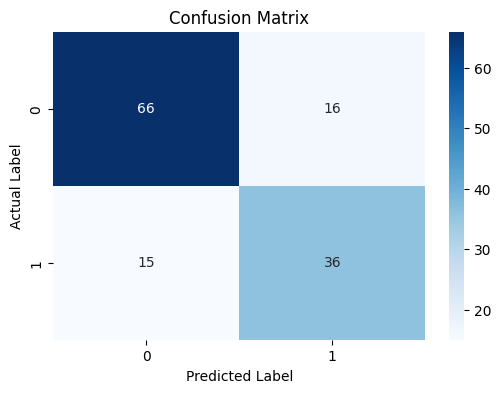

In [259]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [260]:
TP = cm[1,1]  # True Positives
FP = cm[0,1]  # False Positives
FN = cm[1,0]  # False Negatives

# Calculate Precision and Recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Calculate F1 Score
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score:{round(f1*100)}%")

F1 Score:70%
